# Solución prueba técnica Juan P. Sepúlveda Sánchez

In [195]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime, timedelta


## 1. Obtención de Datos (10 puntos)

In [196]:
start_date = datetime(2024,3,15)

end_date = datetime(2024,4,14)

url = "https://l2h237eh53.execute-api.us-east-1.amazonaws.com/dev/precios"

parametros = {
    "start_date" : start_date.strftime("%Y-%m-%d"),
    "end_date" : end_date.strftime("%Y-%m-%d")
}

# Consulta a la API
try: 
    response = requests.get(url, parametros)
    response.raise_for_status()
except requests.exceptions.HTTPError as error:

    raise SystemError(error)


# Extracción de datos
res_json = response.json()
data = res_json["data"]

¿Cuántos días se obtienen de datos?

In [197]:
print(f"Se obtienen {res_json["total_days"]} dias de datos")

Se obtienen 30 dias de datos


## 2. Procesamiento de los Datos (20 puntos) 

In [198]:
# Transformación a dataframe
df = pd.DataFrame(data)
df = df.transpose()

# Cambio de las 24 horas a las 00
df["00:00"] = df["24:00"]
df = df.drop("24:00", axis=1)

## 3. Tratamiento de Datos Faltantes (30 puntos)

In [199]:
# Rellenar datos faltantes
df = df.ffill()

# Adición de dias faltantes
lista_fechas = [(start_date + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((end_date - start_date).days + 1)]

df = df.reindex(lista_fechas)
df = df.transpose()
df.head()

,2024-03-15,2024-03-16,2024-03-17,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22,2024-03-23,2024-03-24,...,2024-04-05,2024-04-06,2024-04-07,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14
01:00,551.70,568.32,589.99,NaN,595.36,641.97,658.67,713.51,773.68,729.05,...,836.12,503.36,700.74,830.40,1010.43,967.38,1005.79,1020.02,1020.02,1056.17
02:00,551.70,568.32,568.49,NaN,574.36,630.77,658.67,708.51,718.87,729.05,...,759.37,502.36,671.24,750.51,905.54,967.38,1005.79,1010.02,1008.02,1055.62
03:00,551.70,568.32,568.49,NaN,574.36,571.77,641.79,696.51,718.87,717.16,...,502.12,501.36,610.74,750.51,905.54,504.97,1005.79,1010.02,995.02,1055.62
04:00,497.36,566.12,568.49,NaN,574.36,550.77,641.79,696.51,718.87,716.96,...,502.12,501.36,605.74,750.51,905.54,504.97,1005.79,1010.02,995.02,1055.62
05:00,551.70,566.12,568.49,NaN,574.36,550.77,641.79,708.51,718.87,700.96,...,759.37,501.36,605.74,750.51,905.54,966.97,1005.79,1010.02,995.02,1010.12


In [ ]:

df_mean = pd.DataFrame(df.mean())
fechas_faltantes = df_mean[df_mean.isna().any(axis=1)].index.tolist()


df_mean7 = df_mean.rolling(window=7,min_periods=1, center=True).mean()
df_mean7.columns = ["Promedio"]

df_mean7.head()


,Promedio
2024-03-15,571.161111
2024-03-16,582.721250
2024-03-17,591.309333
2024-03-18,601.785833
2024-03-19,626.694375


In [201]:
df_fill = df.copy()

for fecha in fechas_faltantes:
    df_fill[fecha] = [df_mean7.loc[fecha].values[0] for i in range(24)]

df_fill.head()

,2024-03-15,2024-03-16,2024-03-17,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22,2024-03-23,2024-03-24,...,2024-04-05,2024-04-06,2024-04-07,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-13,2024-04-14
01:00,551.70,568.32,589.99,601.785833,595.36,641.97,658.67,713.51,773.68,729.05,...,836.12,503.36,700.74,830.40,1010.43,967.38,1005.79,1020.02,1020.02,1056.17
02:00,551.70,568.32,568.49,601.785833,574.36,630.77,658.67,708.51,718.87,729.05,...,759.37,502.36,671.24,750.51,905.54,967.38,1005.79,1010.02,1008.02,1055.62
03:00,551.70,568.32,568.49,601.785833,574.36,571.77,641.79,696.51,718.87,717.16,...,502.12,501.36,610.74,750.51,905.54,504.97,1005.79,1010.02,995.02,1055.62
04:00,497.36,566.12,568.49,601.785833,574.36,550.77,641.79,696.51,718.87,716.96,...,502.12,501.36,605.74,750.51,905.54,504.97,1005.79,1010.02,995.02,1055.62
05:00,551.70,566.12,568.49,601.785833,574.36,550.77,641.79,708.51,718.87,700.96,...,759.37,501.36,605.74,750.51,905.54,966.97,1005.79,1010.02,995.02,1010.12


## 4. Cálculos de Promedios (10 puntos)

In [202]:
# Promedio diario
df_mean = pd.DataFrame(df_fill.mean())
df_mean.columns = ["precio_promedio"]
df_mean.head()


,precio_promedio
2024-03-15,557.669167
2024-03-16,574.449167
2024-03-17,581.365000
2024-03-18,601.785833
2024-03-19,617.401667


In [203]:
# Promedio móvil de 7 días
df_mean7 = df_mean.rolling(window=7,min_periods=1).mean()
df_mean7.columns = ["precio_7d"]
df_mean7.head()

,precio_7d
2024-03-15,557.669167
2024-03-16,566.059167
2024-03-17,571.161111
2024-03-18,578.817292
2024-03-19,586.534167


## 5. Visualización (15 puntos)

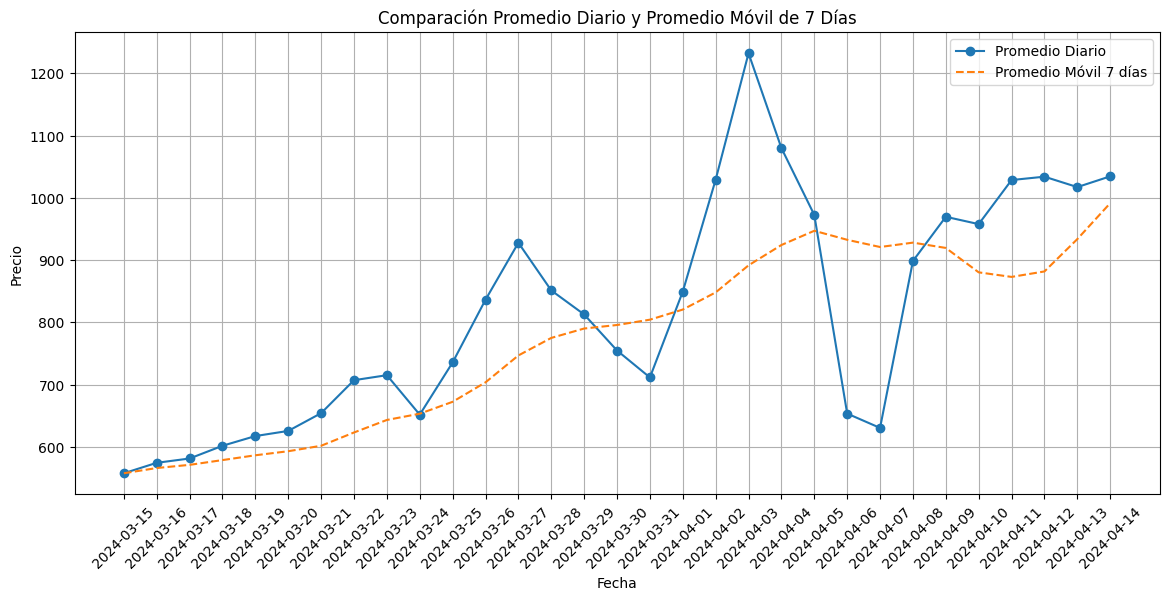

In [204]:
# Gráfica
plt.figure(figsize=(14, 6))
plt.plot(df_mean, label='Promedio Diario', marker='o')
plt.plot(df_mean7, label='Promedio Móvil 7 días', linestyle='--')

plt.title('Comparación Promedio Diario y Promedio Móvil de 7 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Guardar la gráfica
plt.savefig('image.png')
plt.show()

¿Cuál es el comportamiento del precio para el periodo?

*El precio de la energía a lo largo del mes en estudio ha tenido un comportamiento creciente de al rededor del 50%*

## 6. Almacenamiento de Resultados (15 puntos)

In [208]:
df_def = df_mean.merge(df_mean7, left_index=True, right_index=True)
df_def.head()

,precio_promedio,precio_7d
2024-03-15,557.669167,557.669167
2024-03-16,574.449167,566.059167
2024-03-17,581.365000,571.161111
2024-03-18,601.785833,578.817292
2024-03-19,617.401667,586.534167


In [217]:
# Conexión a la base de datos
conn = sqlite3.connect('precios.db')
cursor = conn.cursor()


In [218]:

cursor.execute('''
    CREATE TABLE IF NOT EXISTS precios (
        fecha TEXT PRIMARY KEY,
        precio_promedio REAL,
        precio_7d REAL
    )
''')


for index, row in df_def.iterrows():
    cursor.execute('''
        INSERT INTO precios (fecha, precio_promedio, precio_7d)
        VALUES (?, ?, ?)
    ''', (index, row['precio_promedio'], row['precio_7d']))


In [219]:
conn.commit()
conn.close()